### Un excellent graphique est celui qui donne au spectateur le plus grand nombre d'idées avec le moins d'encre possible, dans le plus petit espace. 
Edward R. Tufte, Professeur de statistiques à l’université de Yale

En datascience, il existe plusieurs bibliothèques pour afficher des graphiques :
- matplotlib
- pandas : pandas utiliser une version trop simplifiée de matplotlib (à éviter si possible)
- seaborn : une version améliorée de matplotlib

Dans le cadre de ce TP nous allons utiliser seaborn. Pourquoi ? L'outil offre plus de graphiques comparé à matplotlib et des designs plus élégants. Toutefois, pour utiliser seaborn, il faudra utiliser (et importer) matplotlib pour afficher nos graphiques. Notez qu'il existe également yellowbrick ou encore bokeh pour gérer les graphiques.

Et pour tester ce nouvel outil, nous allons réutiliser notre DataFrame des naissances par département. Malgré son petit nombre de colonnes, il est possible de s'essayer avec plein de types de graphiques.

# Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.


```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

In [5]:
import pandas as pd

# On importe seaborn et matplotlib vu que nous allons l'utiliser
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)


# le fichier est chargé en tant que DataFrame
liste_prenoms_source = pd.read_csv("data/_tmp-naissances-par-departement-1900-2019.csv", sep=";") 
liste_prenoms_source.head()

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9


In [6]:
liste_prenoms_nettoyage = liste_prenoms_source.copy()
# Nettoyage de notre dataset

# On supprime les colonnes avec les lignes ayant des données manquantes
liste_prenoms_nettoyage.dropna(inplace = True) 

# On supprime les lignes avec la valeur "_PRENOMS_RARES" pour la colonne "preusuel" ou
# XXXX comme valeur pour l'année ou 
# XX comme valeur pour le département
liste_prenoms_nettoyage = liste_prenoms_source[
       (liste_prenoms_source["preusuel"] != "_PRENOMS_RARES") &
        (liste_prenoms_source["annais"] != "XXXX") &
    (liste_prenoms_source["dpt"] != "XX")
]

new_liste_prenoms = liste_prenoms_nettoyage.copy()

# Ligne (line chart)

Assurément l'un des graphiques les plus simples, la ligne permet soit d'afficher la corrélation entre données (une données est exprimée sur l'axe X, et l'autre sur l'axe Y) ou l'évolution d'une donnée au fil du temps. Par ailleurs, notez qu'il est possible d'avoir plusieurs axe Y ou X, mais faites attention à la lisibilité.

In [38]:
# Pour commencer, nous allons afficher l'évolution du nombre de naissances de prénoms

liste_prenoms = pd.Series(["agathe", 'mathilde']).str.lower() # Vous pouvez remplacer les prénoms si vous le souhaitez

un_prenom_df = new_liste_prenoms[
    (liste_prenoms_nettoyage["preusuel"].str.lower().isin(liste_prenoms))
].sort_values(by=['annais'])

un_prenom_df = un_prenom_df.groupby(['annais','preusuel'], as_index=False).agg({'nombre': 'sum'})

plt.figure(figsize=(40, 10))
ligne_graph = sns.lineplot(
        x="annais", # Définit la valeur de la l'axe X 
        y="nombre", # Définit la valeur de la l'axe Y
        hue="preusuel", # Définit la colonne qui va être comparée
        data=un_prenom_df # Définit le dataset
)
plt.xticks(rotation=45)
ligne_graph.set_title(f'Evolution des naissances des prénoms {", ".join(liste_prenoms)} de 1900 à 2019')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Evolution des naissances des prénoms agathe, mathilde de 1900 à 2019')

Vous remarquez que malgré l'affichage d'un graphique, il est relativement compliqué de le lire, nous avons beaucoup de données, effectivement nous pouvons double-cliquer sur notre graphique pour le voir en détails, et même avec ça, lorsque nous nous déplaçons, l'axe des ordonnées disparaît ce qui rend la lecture de notre graphique compliquée. C'est là qu'entre en jeu la librairie "ipympl", elle permet de rajouter de l'interaction aux graphiques de matplotlib.
D'ailleurs "ipympl" est la contraction de "**I**nteractive **Py**thon **M**at**p**lot**l**ib". ipympl n'étant pas natif à Jupyter, nous allons l'installer grâce à pip. Il vous suffit s'exécuter la ligne suivante

In [30]:
# le point d'exclamation indique que nous exécutons une commande de terminal
# !pip install ipympl

# On active en global ipympl
# %matplotlib widget

# Notez que dans un vrai projet, ces deux lignes sont parmi les premières de notre notebook

In [41]:
# Réaffichons notre graphique, nous remarquerez le code n'a pas changé. 
# Toutefois notre graphique ne s'affiche pas de la même façon

liste_prenoms = pd.Series(["agathe", 'mathilde']).str.lower() # Vous pouvez remplacer les prénoms si vous le souhaitez

un_prenom_df = new_liste_prenoms[
    (liste_prenoms_nettoyage["preusuel"].str.lower().isin(liste_prenoms))
].sort_values(by=['annais'])

year_range = pd.Series(range(2000, 2020)).astype(str)
year_range_df = un_prenom_df[un_prenom_df['annais'].isin(year_range)]

un_prenom_df = year_range_df.groupby(['annais','preusuel'], as_index=False).agg({'nombre': 'sum'})

plt.figure(figsize=(10, 8))
ax = sns.barplot(
        x="annais", # Définit la valeur de la l'axe X 
        y="nombre", # Définit la valeur de la l'axe Y
        hue="preusuel", # Définit la colonne qui va être comparée
        data=un_prenom_df # Définit le dataset
)

for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

plt.xticks(rotation=45)
ax.set(xlabel='Années', ylabel='Nombre de naissances')
ax.set_title(f'Evolution des naissances des prénoms {", ".join(liste_prenoms)} de {year_range.iloc[0]} à {year_range.iloc[-1]}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Evolution des naissances des prénoms agathe, mathilde de 2000 à 2019')

     |████████████████████████████████| 41 kB 461 kB/s eta 0:00:01


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
def generate_plot(params):
    display('freferger')
    liste_prenoms = pd.Series(["agathe", 'mathilde']).str.lower() # Vous pouvez remplacer les prénoms si vous le souhaitez

    un_prenom_df = new_liste_prenoms[
        (liste_prenoms_nettoyage["preusuel"].str.lower().isin(liste_prenoms))
    ].sort_values(by=['annais'])

    un_prenom_df = un_prenom_df.groupby(['annais','preusuel'], as_index=False).agg({'nombre': 'sum'})

    plt.figure(figsize=(10, 8))
    ax = sns.lineplot(
            x="annais", # Définit la valeur de la l'axe X 
            y="nombre", # Définit la valeur de la l'axe Y
            hue="preusuel", # Définit la colonne qui va être comparée
            data=un_prenom_df # Définit le dataset
    )
    
    plt.xticks(rotation=45)
    ax.set(xlabel='Années', ylabel='Nombre de naissances')
    ax.set_title(f'Evolution des naissances des prénoms {", ".join(liste_prenoms)} de 1900 à 2019')
    return ax

In [4]:
from ipywidgets import interact
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def f(var):
    display(var)
    generate_plot(var)
    
interact(f, var="hello")

interactive(children=(Text(value='hello', description='var'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(var)>

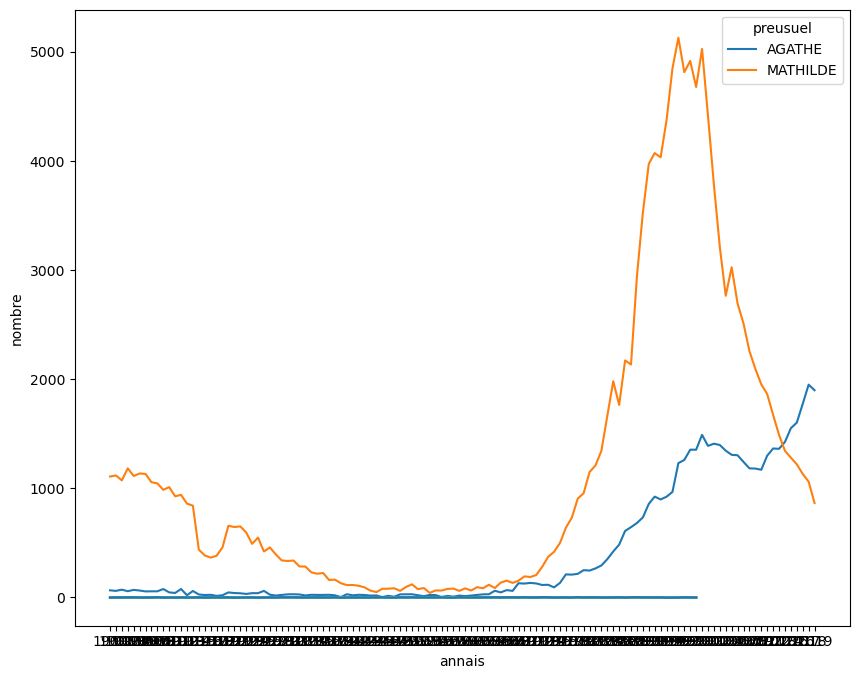